<a href="https://colab.research.google.com/github/bethdfuller/MSDA/blob/main/D209_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D209: Task 2: Predictive Analysis

### Beth Fuller

### August 2024

## A1: Research Question

How likely is a customer to churn, and what are the factors influencing their decision to leave the telecommunications company?

This question will be explored using a random forest classification model. This model works by creating multiple decision trees during training and outputting the majority class (classification) of the individual trees.

## A2: Goal

The goal of this analysis is to identify the factors influencing customer churn and to develop a random forest predictive model to classify customers who are likely to churn. This will enable the telecommunications company to implement targeted retention strategies aimed at reducing churn.

## B1: Method Explanation

The random forest model builds multiple decision trees using random samples of data, each tree makes predictions based on the most important features. By combining the predictions from all the trees, the model’s outcome will be to deliver a final classification (churn yes/no) and identify the key features influencing customer churn.

## B2: Random Forest Assumption

The random forest model assumes that the sampling is representative, a key assumption of decision trees. It relies heavily on the training data and uses bootstrap aggregation to create multiple trees. If the dataset is imbalanced, with one class component underrepresented, trees may overlook it, leading to potential misclassification (StackExchange, n.d).

## B3: Python Packages & Libraries

In [ ]:
#import libraries
import pandas as pd #provides data structure, manipulation and
import seaborn as sns #visualization
import matplotlib.pyplot as plt #plotting
import numpy as np #numerical
from sklearn import metrics #functions that evaluate models
#random forest model
from sklearn.ensemble import RandomForestClassifier #random forest alogrithm
from sklearn.model_selection import RandomizedSearchCV, train_test_split #split data for testing/training
from scipy.stats import randint #creates random integers
#confusion matrix & display, accuracy, precision, recall, MSE & classification report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_squared_error, classification_report
#tree visuals
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## C1: Data Preprocessing Goal

The biggest step in preprocessing was to convert categorical variables into a numeric format for the Random Forest model. One-hot encoding was used to accomplish this. For binary columns, drop_first=True was used to include only one column per category, reducing redundancy and improving the model's simplicity and efficiency. For categorical variables with three or more categories, drop_first=False was used to ensure the model did not lose any important information from these features.

## C2: Numeric/Categorical Variables

Target: Churn (categorical variable)  

Numeric Variables:
* Children
* Age
* Income
* Outage_sec_perweek
* Email
* Contacts
* Yearly_equip_failure
* Tenure
* Monthly Charge
* Bandwidth GB Year

Categorical Variables:
* Area
* Marital
* Gender
* Internet Service
* PaymentMethod
* Contract
* Techie
* Port_modem
* Tablet
* Phone
* Multiple
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* PaperlessBilling

## C3: Data Cleaning

The initial data inspection showed 10,000 records and 50 attributes. The data will be cleaned via the following steps which follows previous work (Fuller, 2024):

* **Drop** - columns that are unnecessary at this time for the random forest model.
* **Missing values** - check for and address missing values (i.e. delete, input).
  * .isnull.sum()
* **Duplicate values** - check for and address duplicate values (i.e remove).
  * .duplicated()
  * .duplicated().valuecounts()
* **Outliers** - check for and address outliers.
  * .describe()
  * .plot to create box plots
* **One Hot Encoding** - categorical that does not have an ordinal relationship will be transformed via one hot encoding.
  * .get_dummies
  * drop_first=True will be used with boolean categorical variables
  * drop_first=False will be used when there are 2+ categorical options

## Code

In [ ]:
#import libraries
import pandas as pd #provides data structure, manipulation and
import seaborn as sns #visualization
import matplotlib.pyplot as plt #plotting
import numpy as np #numerical
from sklearn import metrics #functions that evaluate models
#random forest model
from sklearn.ensemble import RandomForestClassifier #random forest alogrithm
from sklearn.model_selection import RandomizedSearchCV, train_test_split #split data for testing/training
from scipy.stats import randint #creates random integers
#confusion matrix & display, accuracy, precision, recall, MSE & classification report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_squared_error, classification_report
#tree visuals
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Display maximum columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 60)

# URL to churn data set
url = 'https://raw.githubusercontent.com/bethdfuller/MSDA/main/D209/churn_clean.csv'

# Read churn data set / use keep_default_na to correctly read InternetService value of None
churndf = pd.read_csv(url, keep_default_na=False)

In [ ]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### C3: Drop Columns

In [ ]:
# Columns to drop
drop_columns = ['CaseOrder', 'Interaction', 'UID', 'City', 'State',
                'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
                'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7',
                'Item8']

# Drop columns
churndf.drop(columns=drop_columns, inplace=True)

churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

### C3: Missing Values

In [ ]:
churndf.isnull().sum()

,0
Customer_id,0
Area,0
Children,0
Age,0
Income,0
Marital,0
Gender,0
Churn,0
Outage_sec_perweek,0
Email,0


### C3: Duplicates

In [ ]:
churndf.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
churndf.duplicated().value_counts()

,count
False,10000


### C3: Outliers

In [ ]:
churndf.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


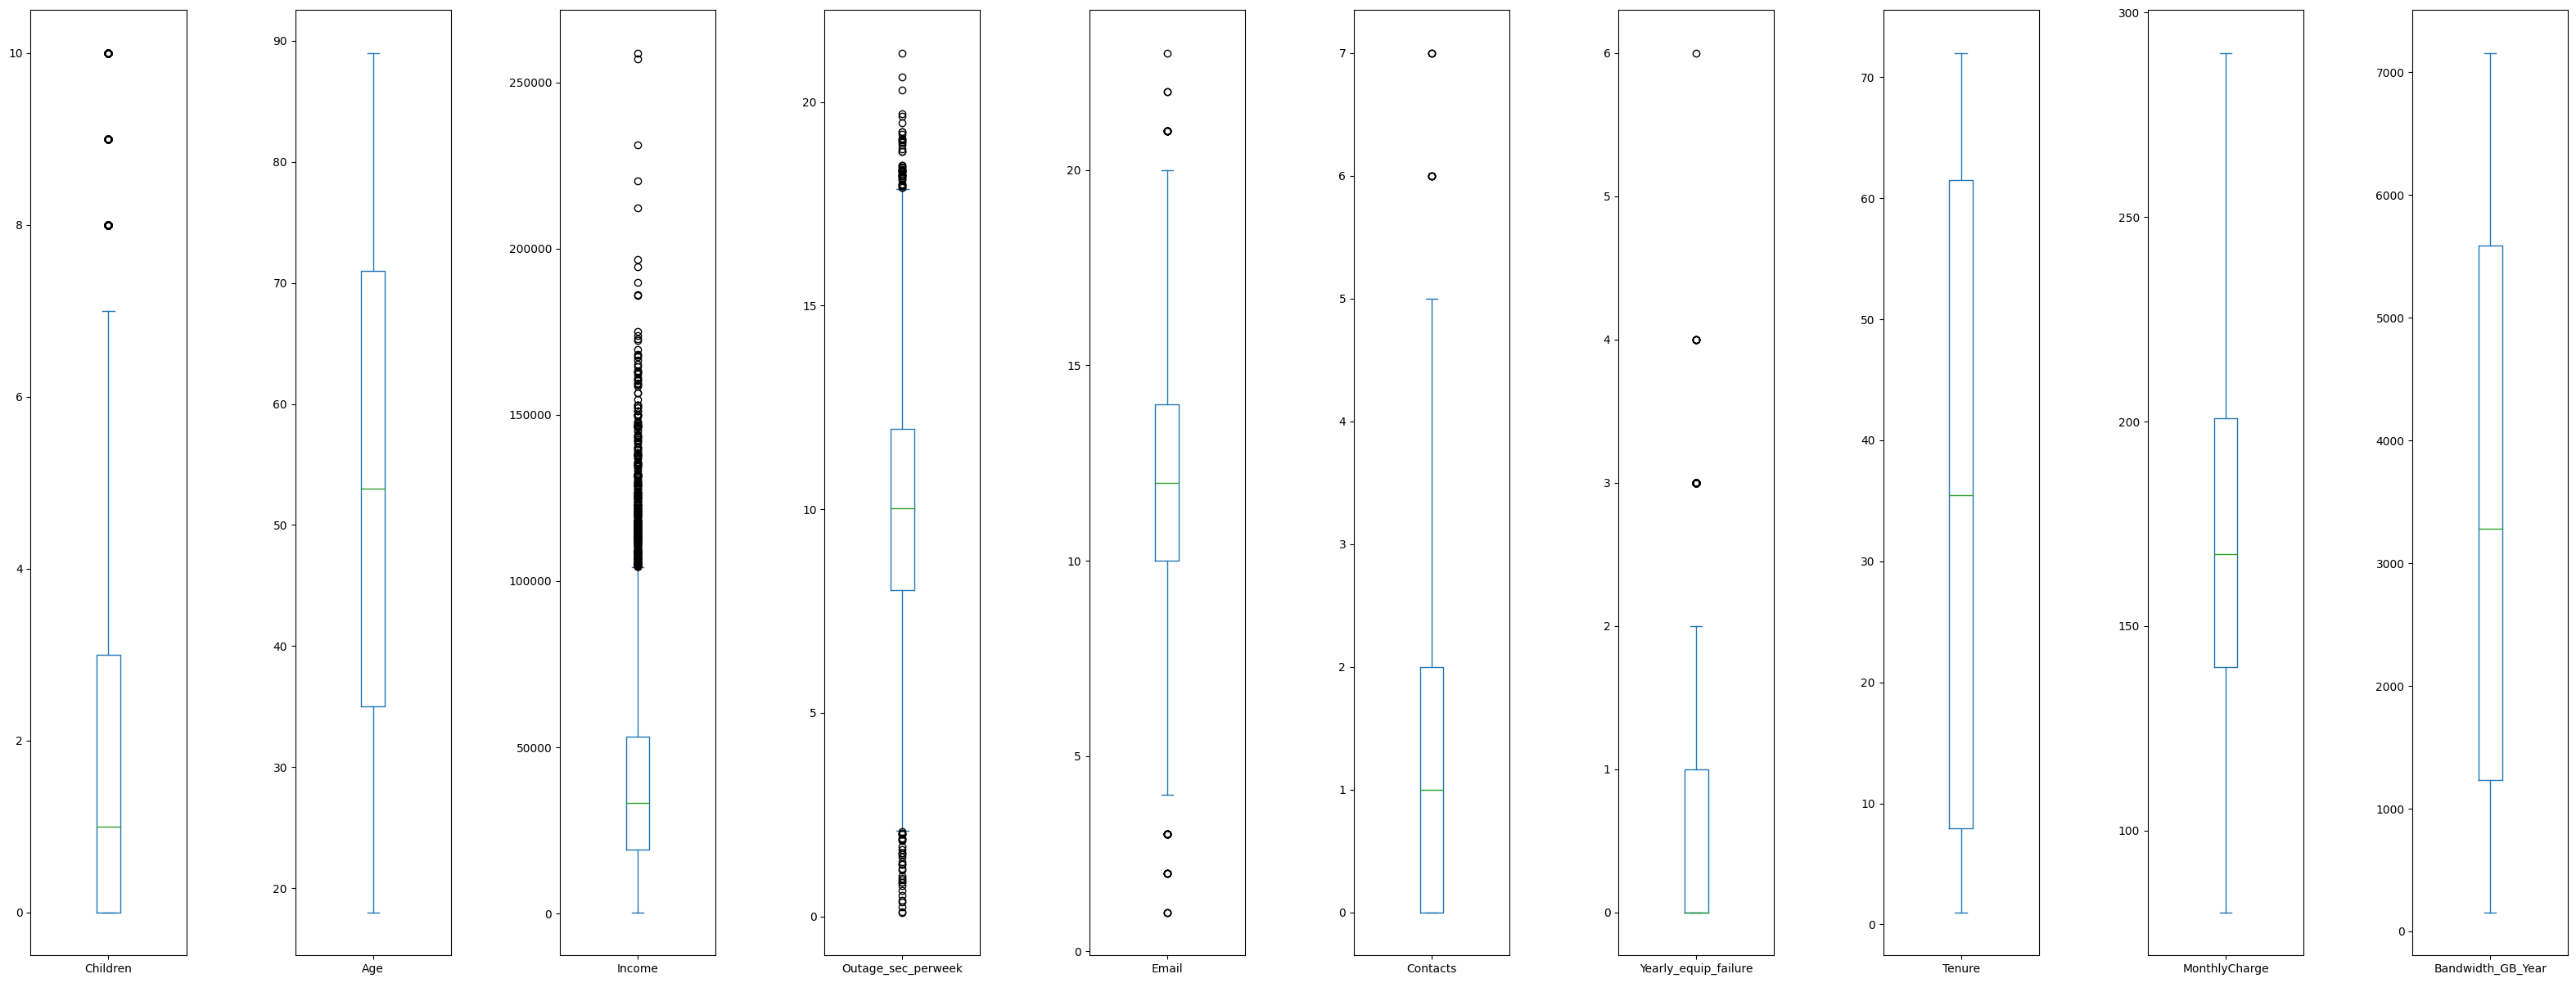

In [ ]:
# Boxplots to view variable outliers

churndf.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(40, 15)
)

plt.subplots_adjust(wspace=0.7)
plt.show()

### C3: Data Transformation

In [ ]:
churndf_e = pd.get_dummies(churndf, columns=['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
                                             'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                                             'PaperlessBilling'], drop_first=True)

churndf_e = pd.get_dummies(churndf_e, columns=['Area', 'Marital', 'Gender', 'InternetService', 'PaymentMethod', 'Contract'], drop_first=False)

churndf_e.info()
churndf_e.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Customer_id                             10000 non-null  object 
 1   Children                                10000 non-null  int64  
 2   Age                                     10000 non-null  int64  
 3   Income                                  10000 non-null  float64
 4   Outage_sec_perweek                      10000 non-null  float64
 5   Email                                   10000 non-null  int64  
 6   Contacts                                10000 non-null  int64  
 7   Yearly_equip_failure                    10000 non-null  int64  
 8   Tenure                                  10000 non-null  float64
 9   MonthlyCharge                           10000 non-null  float64
 10  Bandwidth_GB_Year                       10000 non-null  flo

,Customer_id,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Churn_Yes,Techie_Yes,Port_modem_Yes,Tablet_Yes,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,K409198,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,False,False,True,True,True,False,True,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
1,S120509,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,True,True,False,True,True,True,True,False,False,False,True,True,True,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False
2,K191035,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,False,True,True,False,True,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,True
3,D90850,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,False,True,False,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,True
4,K662701,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,True,False,True,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False


## C4: Export CSV

In [ ]:
churndf_e.to_csv('churndf_clean_nb.csv', index=False)

## D1: Split Test/Training Data

In [ ]:
from sklearn.model_selection import train_test_split

X = churndf_e.drop(columns=['Churn_Yes', 'Customer_id'])
y = churndf_e['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=107)

#### Export Testing / Training Data Set

In [ ]:
X_train.to_csv('nb_x_train.csv', index=False)
X_test.to_csv('nb_x_test.csv', index=False)
y_train.to_csv('nb_y_train.csv', index=False)
y_test.to_csv('nb_y_test.csv', index=False)

## D2: Random Forest

The Random Forest is an ensemble learning method for classification tasks, such as predicting customer churn. It builds multiple decision trees from random subsets of features and makes final predictions based on the majority vote among the trees (DataCamp).

The random forest model was built by the following steps:
* **Split Data into Training/Testing:**
  * Utilized scikit-learn’s train_test_split to split the dataset into training and testing sets.
* **Hyperparameter Tuning:**
  * Applied scikit-learn’s RandomizedSearchCV to conduct a randomized search for the best hyperparameters and evaluate their performance using cross-validation.
  * n_estimators: Tested values ranged from 10 to 100.
  * max_depth: Tested values ranged from 1 to 20.
  * n_iter: Performed 50 iterations of random sampling.
  * cv: Employed 5-fold cross-validation.
* **Model Evaluation:**
  * Confusion Matrix: Generated to assess the model's performance across different classes.
  * Metrics Calculated:
  * Accuracy: Measures the proportion of correctly classified instances.
  * Precision: Evaluates the accuracy of positive predictions.
  * Recall: Assesses the model's ability to identify all relevant positive instances.
  * Mean Squared Error (MSE): Quantifies the average squared difference between actual and predicted values.

  This model was created by following the Random Forest Classification with Scikit-Learn tutorial (DataCamp, n.d.).

## D3: Random Forest Model

In [ ]:
param_dist = {'n_estimators': randint(10,100),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=50,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 97}


## D3: Model Evaluation

Accuracy: 0.889

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1480
           1       0.82      0.73      0.77       520

    accuracy                           0.89      2000
   macro avg       0.87      0.84      0.85      2000
weighted avg       0.89      0.89      0.89      2000

Mean Squared Error (MSE): 0.1110

Confusion Matrix:
 [[1398   82]
 [ 140  380]]


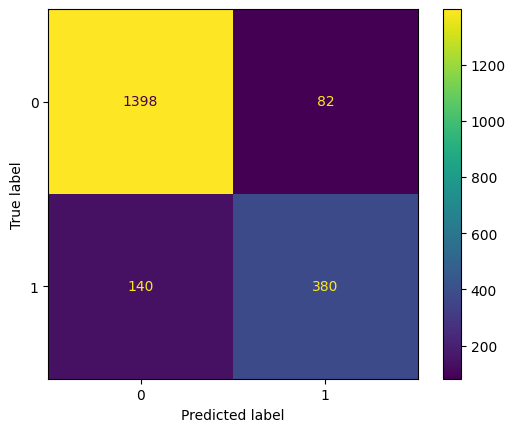

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# bool for MSE calculation
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

# Confusion matrix
cm = confusion_matrix(y_test_int, y_pred_int)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Metrics
accuracy = accuracy_score(y_test_int, y_pred_int)
precision = precision_score(y_test_int, y_pred_int)
recall = recall_score(y_test_int, y_pred_int)
mse = mean_squared_error(y_test_int, y_pred_int)

print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n")
print(classification_report(y_test_int, y_pred_int))
print(f"Mean Squared Error (MSE): {mse:.4f}\n")
print("Confusion Matrix:\n", cm)


## Random Forest Tree Graph

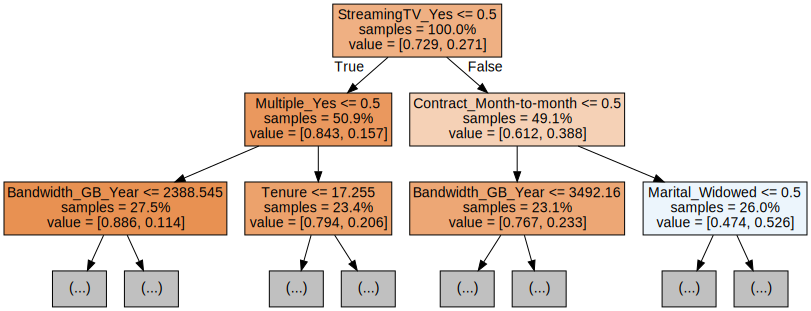

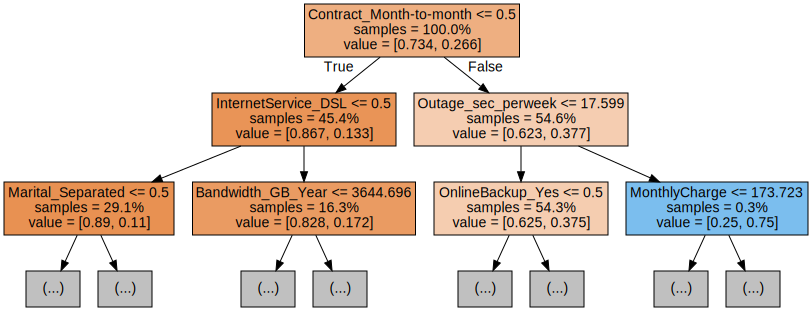

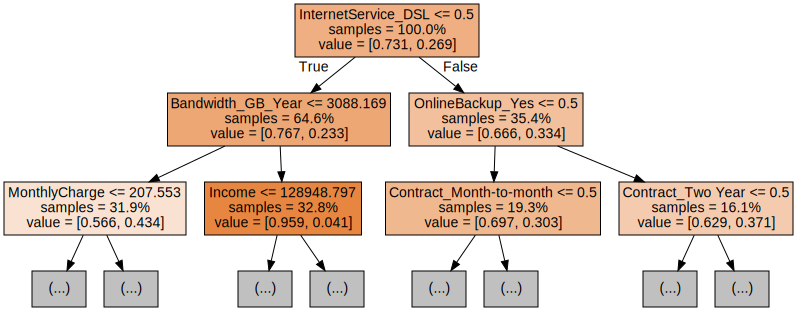

In [ ]:
for i in range(3):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

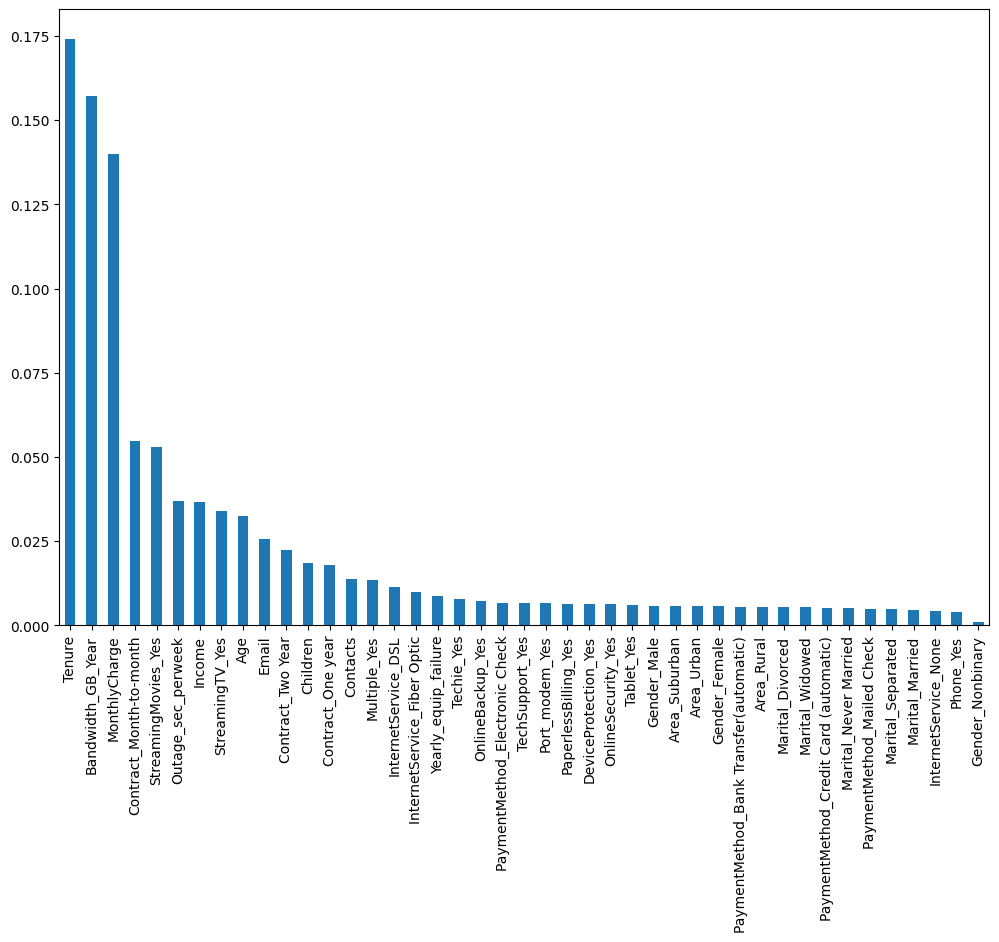

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
plt.figure(figsize=(12, 8))
feature_importances.plot.bar();

## E1: Accuracy & MSE

The Random Forest model achieved a high accuracy of 0.8975, demonstrating strong performance in classifying both churn and non-churn customers.

The Mean Squared Error (MSE) for the categorical churn/no-churn classification model was 0.1025. Although MSE is not typically used for classification tasks, this value suggests that the model's predictions are close to the actual values, indicating effective classification performance.

## E2: Results & Implications

The model demonstrates strong performance with a high accuracy of 89.75%, suggesting that the telecommunications company could effectively leverage this model to predict customer churn. The precision, recall, and F1-scores are all above 75%, indicating that the model is well-balanced and reliable in its predictions.

An examination of the confusion matrix reveals that the model correctly identified 392 cases of customer churn, providing the company with valuable insights to target customers at risk.

Additionally, the model identifies key factors influencing churn, such as tenure, bandwidth usage, and streaming services, which the company can focus on to enhance retention strategies.


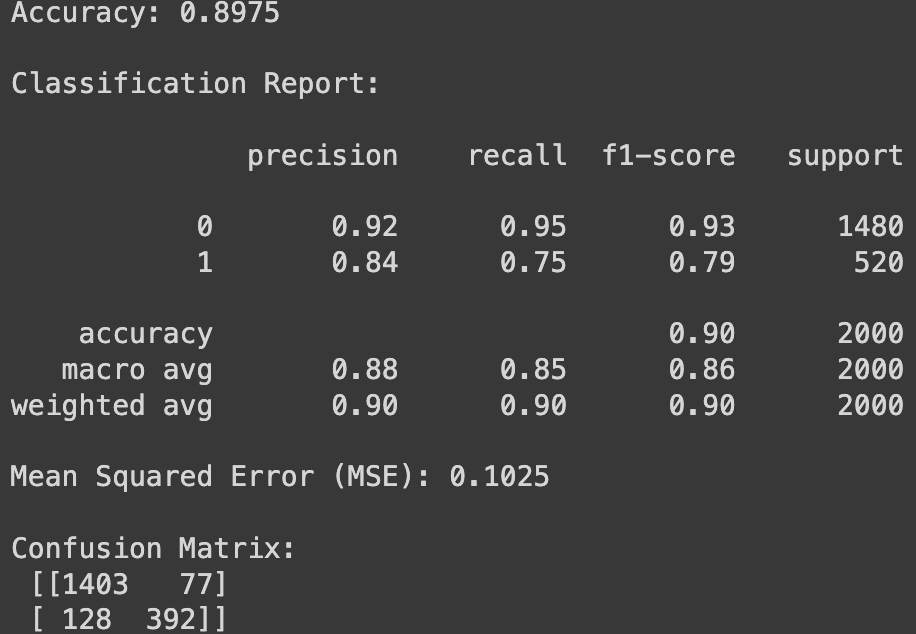

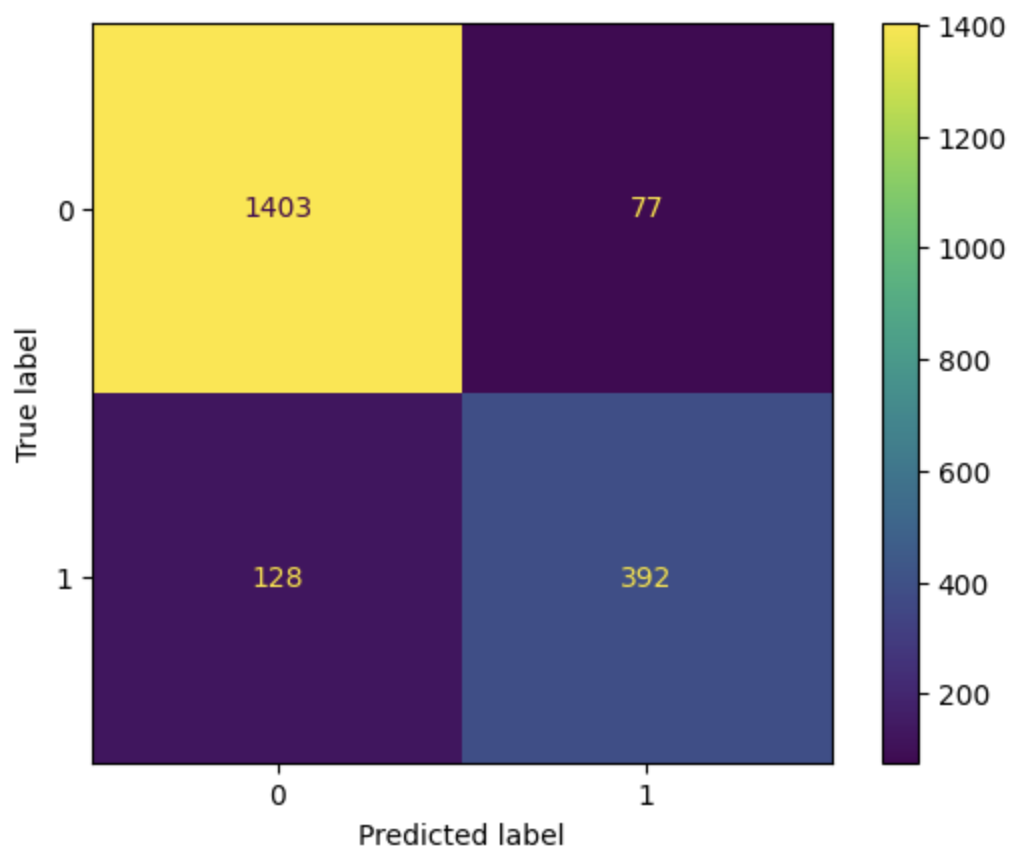

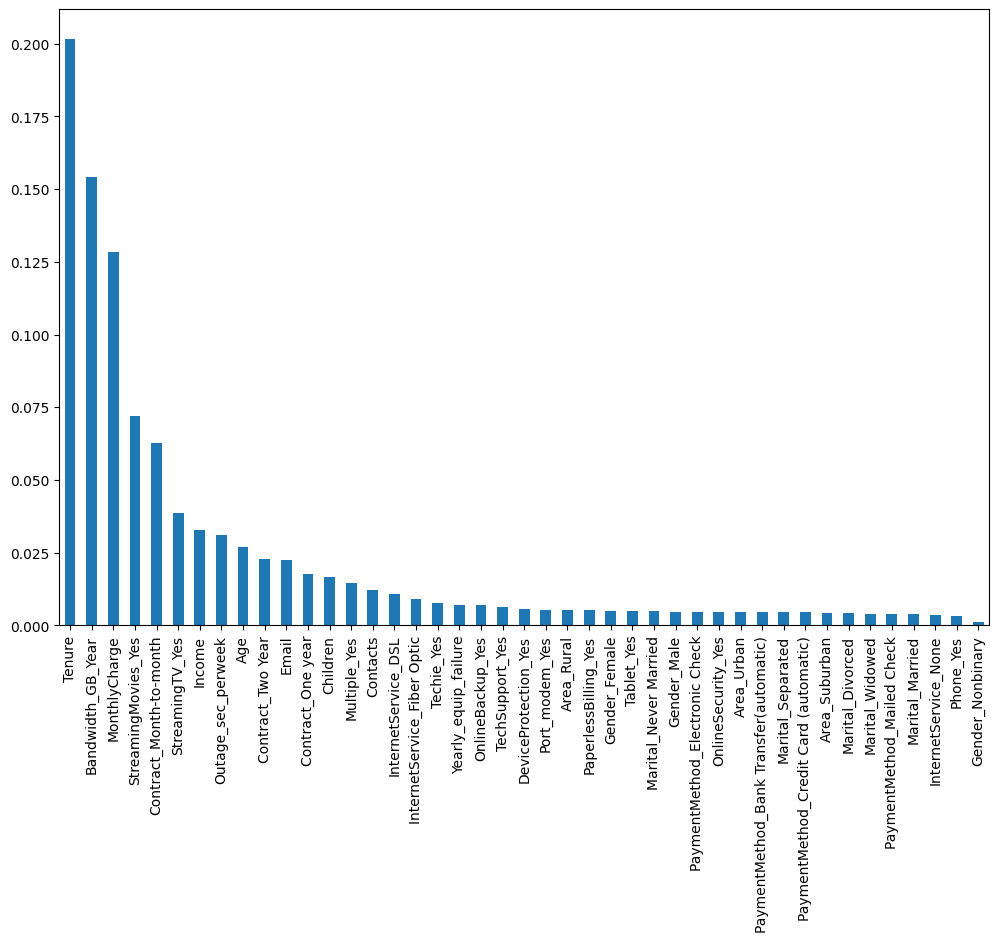

## E3: Limitation

A limitation of using the random forest model for classification is its susceptibility to covariate shift (Dove, 2023). If there are substantial changes in the distribution of input values, the model may struggle to make accurate predictions. For the telecommunications company examples would be  large fluctuations in pricing or usage patters. Therefore, it is important to monitor data distribution closely and be prepared to update or retrain the model if significant changes occur.

## E4: Recommendations

The telecommunications company can focus on customers predicted to churn by the model to enhance retention efforts. Key factors like tenure, bandwidth usage, and streaming services can be examined to reduce churn. By rerunning the model monthly with updated data, the company can continually identify customers at risk and adjust strategies as needed

## F: Demonstration

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=0a604be8-06d5-4a30-a3bf-b1c70026e32d

## Sources

DataCamp. (n.d.). Random Forests in Python. DataCamp. Retrieved August 8, 2024, from https://www.datacamp.com/tutorial/random-forests-classifier-python

Dove, J. (2023, August 6). A limitation of random forest regression. Towards Data Science. https://towardsdatascience.com/a-limitation-of-random-forest-regression-db8ed7419e9f

Fuller, B. (2024, July.). D209 Task 1 [Jupyter Notebook]. GitHub. https://github.com/bethdfuller/MSDA/blob/main/D209/D209_1.ipynb

Grus, J. (2019). Data science from scratch: First principles with Python (2nd ed.). O'Reilly Media.